## Airbnb NYC, Case Study

### Storytelling Assignment

### Problem Statement
   You are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.
   The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue such as -

* Which type of hosts to acquire more and where?
* The categorisation of customers based on their preferences.
* What are the neighbourhoods they need to target?
* What is the pricing ranges preferred by customers?
* The various kinds of properties that exist w.r.t. customer preferences.
* Adjustments in the existing properties to make it more customer-oriented.
* What are the most popular localities and properties in New York currently?
* How to get unpopular properties more traction? and so on...

### STEP 1: Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#to view the results of all columns and rows
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

### STEP  2: Importing file and understanding data

In [2]:
# importing the required file
df= pd.read_csv("D:\Documents\DataScience\DataStorytelling\Assignment\AB_NYC_2019.csv")

In [3]:
# verifying the file has been loaded properly; viewing first 5 records of dataframe
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
# to view last 5 rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
# To view the number of rows and columns
df.shape

(48895, 16)

In [6]:
# To understand data statistically
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Observations:
   * Outliers are present in **'Price','minimum_nights','number_of_reviews','reviews_per_month'**, as there are many folds different between values of 75% and max;Will investigate in this further

In [7]:
# to view the datatype of column and presence of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# to view the datatypes
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### STEP 3: Data Cleaning 

In [9]:
#Converting last_review to date type
df['last_review'] = pd.to_datetime(df['last_review'])

In [10]:
# To view percentage of null values
df.isnull().mean()*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

#### Observations
* last_review and reviews_per_month columns are having missing values for about 20 percent; 
* Assuming customers have not given reviews for these listings; these are least preferred by customers; So filling the null values with 0
* For last_review column we are not imputing the null values; let it be blanks itself for whole analysis; As it is a date column not imputing with any values
* Few null values in name and host_name suggests that these values are missing by chance; so those information has to collected by concerned team ; as of now leaving then blanks itself

In [11]:
# Replacing null values in reviews_per_month column with 0
df["reviews_per_month"].fillna(0,inplace=True)

In [12]:
# There are few listings with price 0, which is not normal ; have to look into this also
len(df[df["price"]==0])

11

In [13]:
# Dropping few columns which will not be used for analysis
df.drop("id",axis=1,inplace=True)
df.drop("host_id",axis=1,inplace=True)

In [14]:
# Segmenting the columns
location_cols=[ 'latitude','longitude']

In [15]:
date_col=['last_review']

In [16]:
cat_cols=["neighbourhood_group","neighbourhood","room_type"]
for i in cat_cols:
    print(df[i].value_counts().sort_values())  

neighbourhood_group
Staten Island      373
Bronx             1091
Queens            5666
Brooklyn         20104
Manhattan        21661
Name: count, dtype: int64
neighbourhood
Willowbrook                      1
Woodrow                          1
Fort Wadsworth                   1
Rossville                        1
New Dorp                         1
Richmondtown                     1
West Farms                       2
Silver Lake                      2
Lighthouse Hill                  2
Howland Hook                     2
Co-op City                       2
Bay Terrace, Staten Island       2
Westerleigh                      2
Breezy Point                     3
Neponsit                         3
Graniteville                     3
Eltingville                      3
Huguenot                         3
Prince's Bay                     4
Olinville                        4
Spuyten Duyvil                   4
Holliswood                       4
Mill Basin                       4
Castleton Corners   

In [17]:
#Checking for misspelling
for i in cat_cols:
    print(sorted(df[i].unique()))

['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', 'Astoria', 'Bath Beach', 'Battery Park City', 'Bay Ridge', 'Bay Terrace', 'Bay Terrace, Staten Island', 'Baychester', 'Bayside', 'Bayswater', 'Bedford-Stuyvesant', 'Belle Harbor', 'Bellerose', 'Belmont', 'Bensonhurst', 'Bergen Beach', 'Boerum Hill', 'Borough Park', 'Breezy Point', 'Briarwood', 'Brighton Beach', 'Bronxdale', 'Brooklyn Heights', 'Brownsville', "Bull's Head", 'Bushwick', 'Cambria Heights', 'Canarsie', 'Carroll Gardens', 'Castle Hill', 'Castleton Corners', 'Chelsea', 'Chinatown', 'City Island', 'Civic Center', 'Claremont Village', 'Clason Point', 'Clifton', 'Clinton Hill', 'Co-op City', 'Cobble Hill', 'College Point', 'Columbia St', 'Concord', 'Concourse', 'Concourse Village', 'Coney Island', 'Corona', 'Crown Heights', 'Cypress Hills', 'DUMBO', 'Ditmars Steinway', 'Dongan Hills', 'Douglaston', 'Downtown Brooklyn', 'Dyker Heights', 'East Elmhurst', 'East Flatbu

In [18]:
# Replacing misspelt neighbourhood
df["neighbourhood"]=df["neighbourhood"].replace("Bay Terrace, Staten Island","Bay Terrace")

In [19]:
num_cols=["price","minimum_nights","number_of_reviews",
          "reviews_per_month","calculated_host_listings_count","availability_365"]

In [50]:
# Extracting month,year from last_review
df['last_reviews_month'] = df['last_review'].dt.month
df['last_reviews_year'] = df['last_review'].dt.year

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (1903914128.py, line 2)

In [55]:
df['last_reviews_month'] = df['last_reviews_month'].fillna(0).astype("int")
df['last_reviews_year']= df['last_reviews_year'].fillna(0).astype("int")

In [ ]:
# Categorizing Host as Individual and Professional based on number of listings they possess
df["Type_Of_Host"]= df['calculated_host_listings_count'].apply(lambda x: 'Individual_host' if x < 2 else 'Professional_Host')

### Univariate Analysis

### Handling Outliers

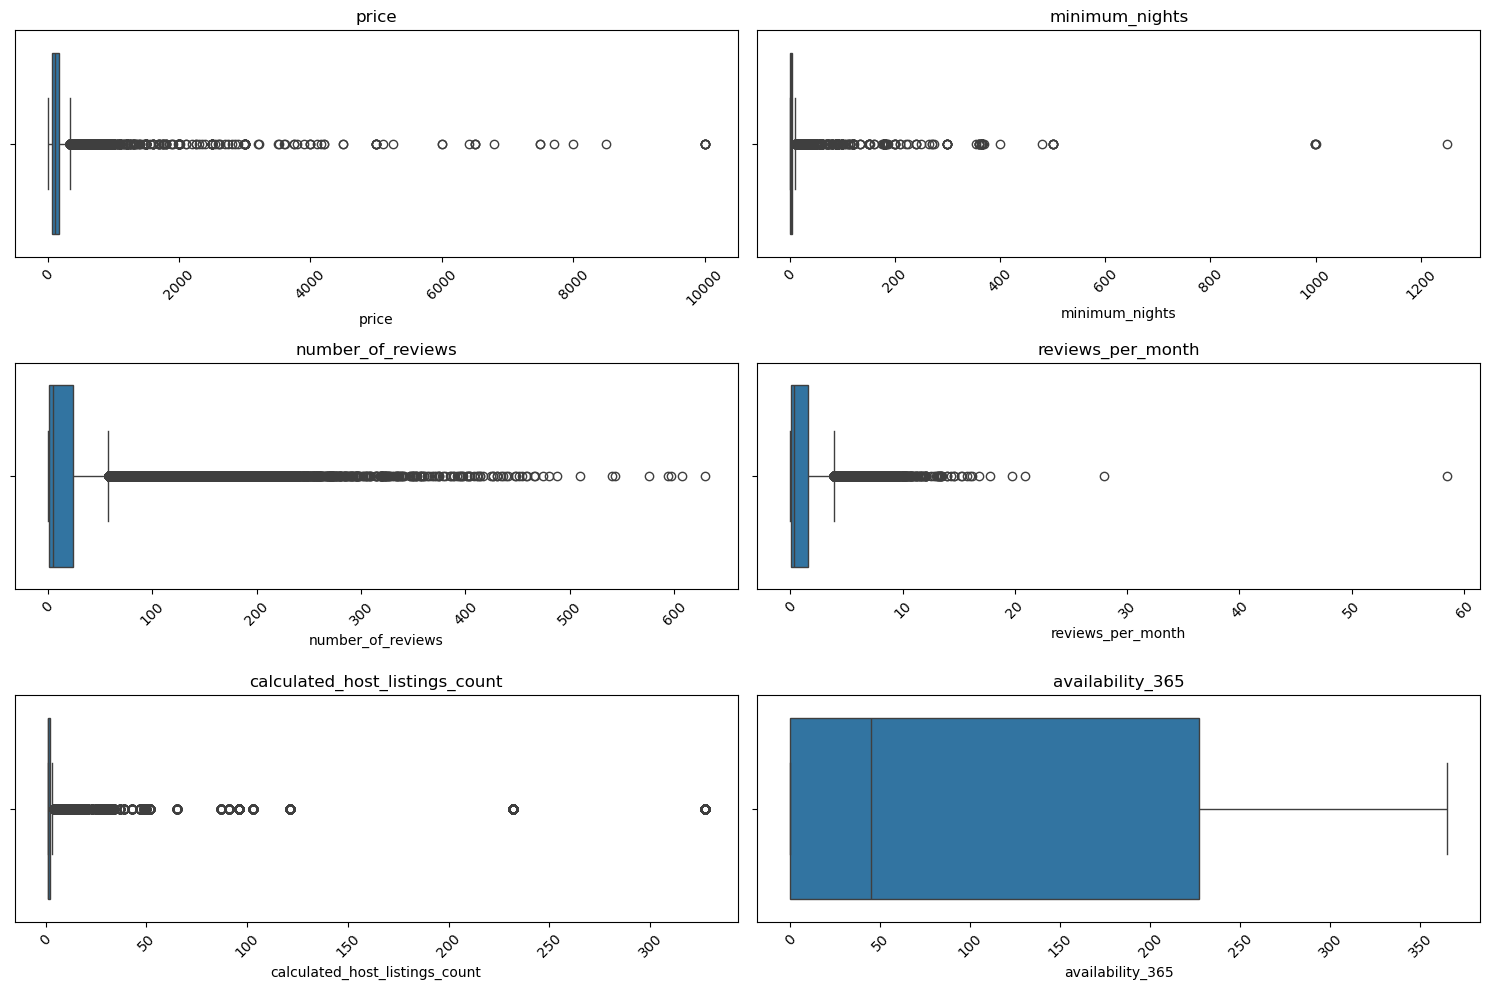

In [21]:
plt.figure(figsize=(15,10))
for i in enumerate(num_cols):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x=df[i[1]])
    plt.title(i[1])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Obseravtions
* Handled the outliers by capping values above the 99th percentile at the 99th percentile value, as there was a significant difference between the 99th percentile and the maximum values. This method was applied to all columns where outliers were present to ensure consistency and prevent extreme values from skewing the analysis

In [23]:
for i in num_cols:
    print(i)
    print(df[i].quantile(0.99))
    print(df[i].quantile(1))
    print("\n")

price
799.0
10000.0


minimum_nights
45.0
1250.0


number_of_reviews
214.0
629.0


reviews_per_month
6.8
58.5


calculated_host_listings_count
232.0
327.0


availability_365
365.0
365.0




In [24]:
outlier_handling_cols=["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count"]

In [25]:
for i in outlier_handling_cols:
    df.loc[df[i]>df[i].quantile(0.99),i]=df[i].quantile(0.99)
    

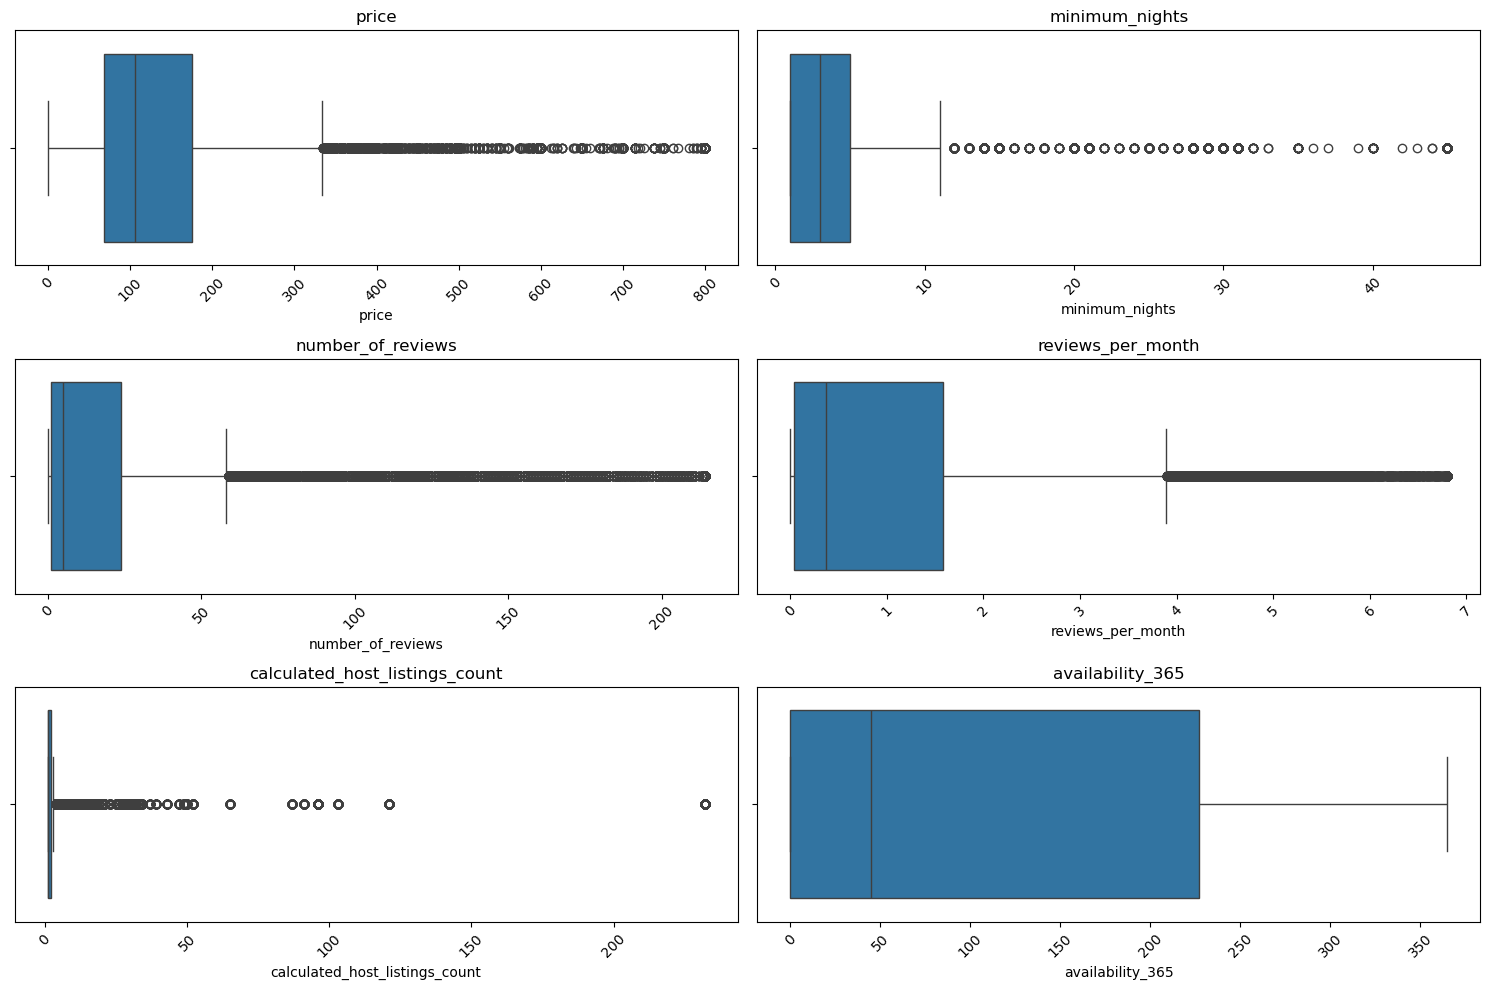

In [26]:
plt.figure(figsize=(15,10))
for i in enumerate(num_cols):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x=df[i[1]])
    plt.title(i[1])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Univariate analysis -  numerical columns

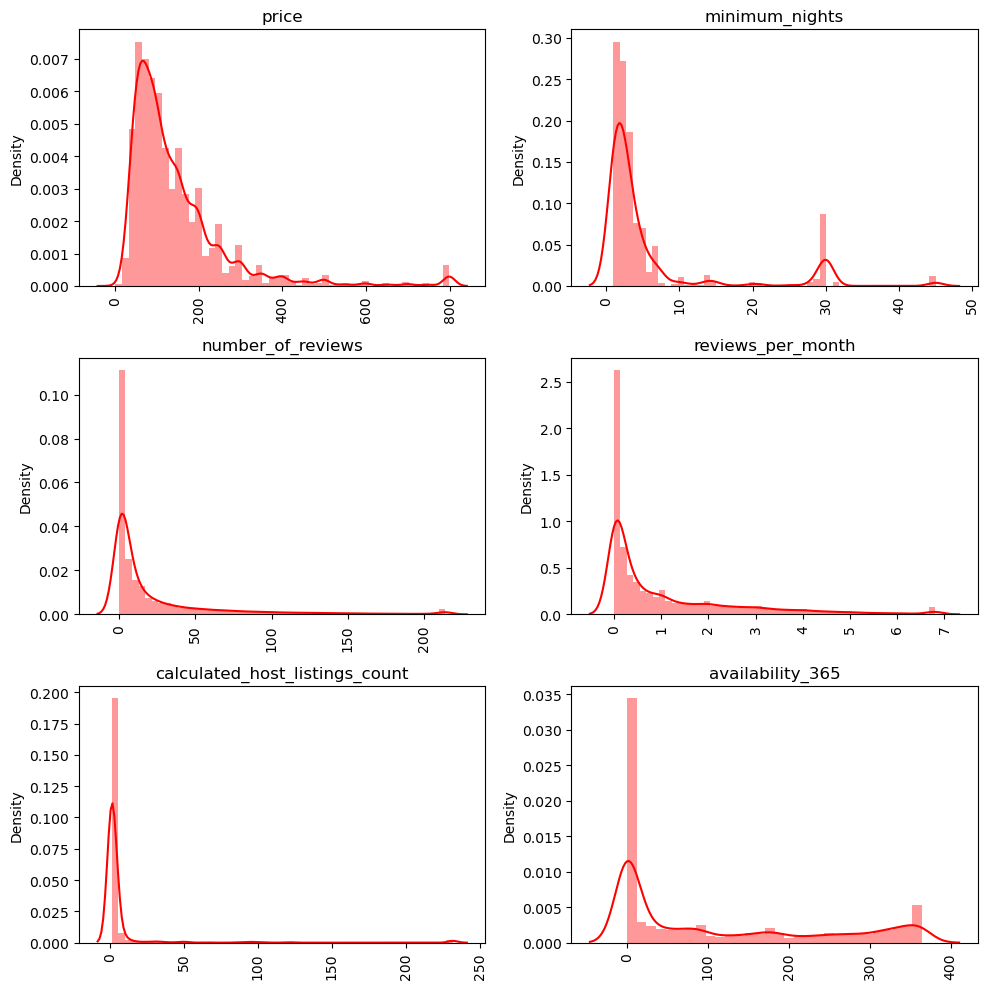

In [46]:
num_cols_1=["price","minimum_nights","number_of_reviews",
          "reviews_per_month","availability_365"]
plt.figure(figsize=(10,10))
sns.set_palette("pastel")
for i in enumerate(num_cols):
    plt.subplot(3,2,i[0]+1)
    ax=sns.distplot(x=df[i[1]],color='red')
    plt.title(i[1])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: xlabel='calculated_host_listings_count', ylabel='Density'>

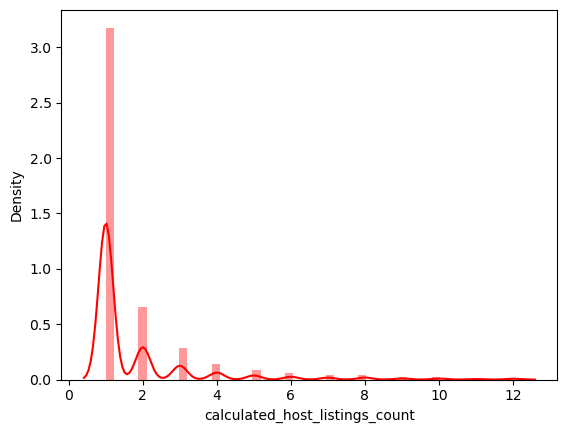

In [28]:
df1=df[df["calculated_host_listings_count"]<=12]
bins = [0,2,4,6,8,10,12] 
sns.distplot(df1["calculated_host_listings_count"], color='red')

### Binning/ Grouping the columns

Price_Group
0-200      4050000
200-400     662100
400-600      98500
600-800      77800
Name: count, dtype: int64


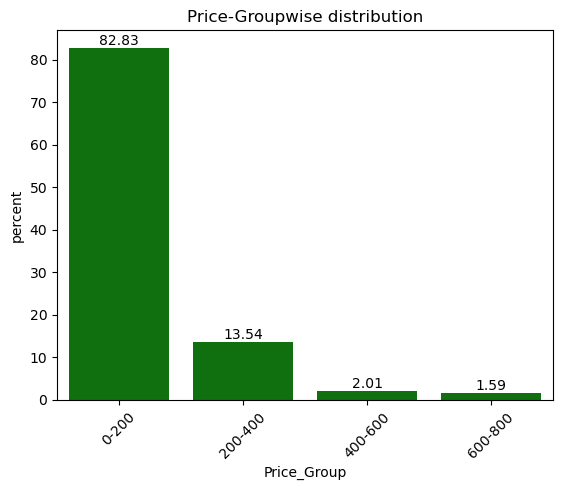

In [29]:
# Binning numerical columns for easy analysis
# Grouping the "Price" column and visualizing them; which will give more insights for this analysis
bins = [0,200,400,600,800]
slots = ["0-200","200-400","400-600","600-800"]
df["Price_Group"] = pd.cut(df["price"], bins=bins, labels=slots)
print(100*(df["Price_Group"].value_counts().sort_values(ascending=False)))
ax=sns.countplot(x=df["Price_Group"],stat="percent",palette=['g'])
plt.title("Price-Groupwise distribution")
plt.xticks(rotation=45)
for container in ax.containers: #to show percentage value above each bar
    ax.bar_label(container,fmt='%.2f') #formatting the percentage value round to 2 values
plt.show()

minimum_nights_group
1-3 days             1969500
3-7 days              914700
for a month           396100
more than a week      282600
more than a month      54600
Name: count, dtype: int64


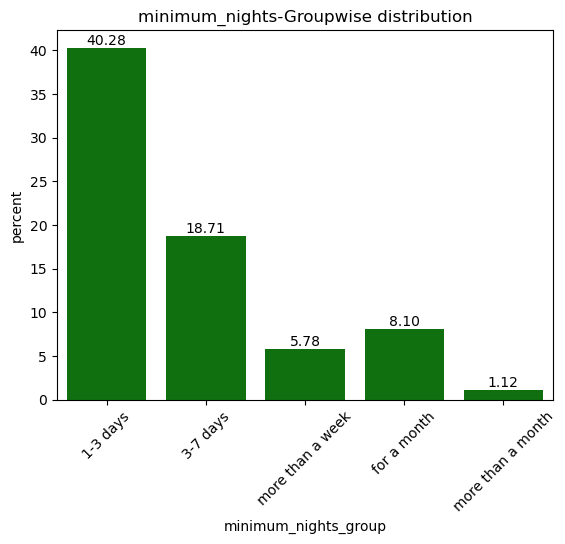

In [30]:
# Grouping the "minimum_nights" column and visualizing them; which will give more insights for this analysis
bins = [1,3,7,29,31,45]
slots = ["1-3 days","3-7 days","more than a week","for a month","more than a month"]
df["minimum_nights_group"] = pd.cut(df["minimum_nights"], bins=bins, labels=slots)
print(100*(df["minimum_nights_group"].value_counts().sort_values(ascending=False)))
ax=sns.countplot(x=df["minimum_nights_group"],stat="percent",palette=['g'])
plt.title("minimum_nights-Groupwise distribution")
plt.xticks(rotation=45)
for container in ax.containers: #to show percentage value above each bar
    ax.bar_label(container,fmt='%.2f') #formatting the percentage value round to 2 values
plt.show()

number_of_reviews_group
upto 10          2027100
10-40            1018600
40-80             427100
more than 100     299500
80-100            112000
Name: count, dtype: int64


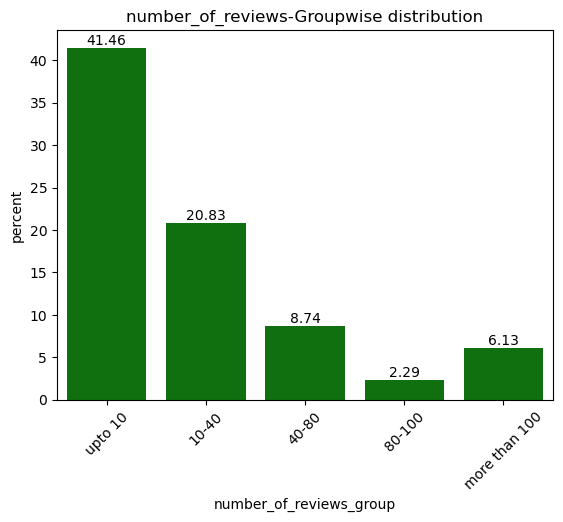

In [31]:
# Grouping the "number_of_reviews" column and visualizing them; which will give more insights for this analysis
bins = [0,10,40,80,100,220]
slots = ["upto 10","10-40","40-80","80-100","more than 100"]
df["number_of_reviews_group"] = pd.cut(df["number_of_reviews"], bins=bins, labels=slots)
print(100*(df["number_of_reviews_group"].value_counts().sort_values(ascending=False)))
ax=sns.countplot(x=df["number_of_reviews_group"],stat="percent",palette=['g'])
plt.title("number_of_reviews-Groupwise distribution")
plt.xticks(rotation=45)
for container in ax.containers: #to show percentage value above each bar
    ax.bar_label(container,fmt='%.2f') #formatting the percentage value round to 2 values
plt.show()

availability_365_group
more than 100    664800
10-40            386600
40-80            357500
upto 10          261200
80-100           218400
Name: count, dtype: int64


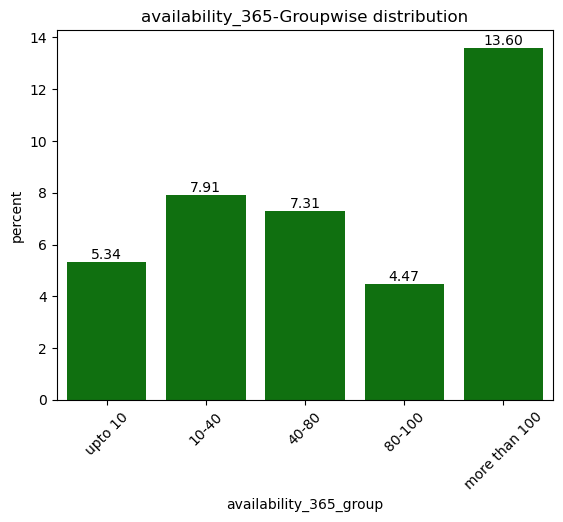

In [32]:
# Grouping the "number_of_reviews" column and visualizing them; which will give more insights for this analysis
bins = [0,10,40,80,100,220]
slots = ["upto 10","10-40","40-80","80-100","more than 100"]
df["availability_365_group"] = pd.cut(df["availability_365"], bins=bins, labels=slots)
print(100*(df["availability_365_group"].value_counts().sort_values(ascending=False)))
ax=sns.countplot(x=df["availability_365_group"],stat="percent",palette=['g'])
plt.title("availability_365-Groupwise distribution")
plt.xticks(rotation=45)
for container in ax.containers: #to show percentage value above each bar
    ax.bar_label(container,fmt='%.2f') #formatting the percentage value round to 2 values
plt.show()

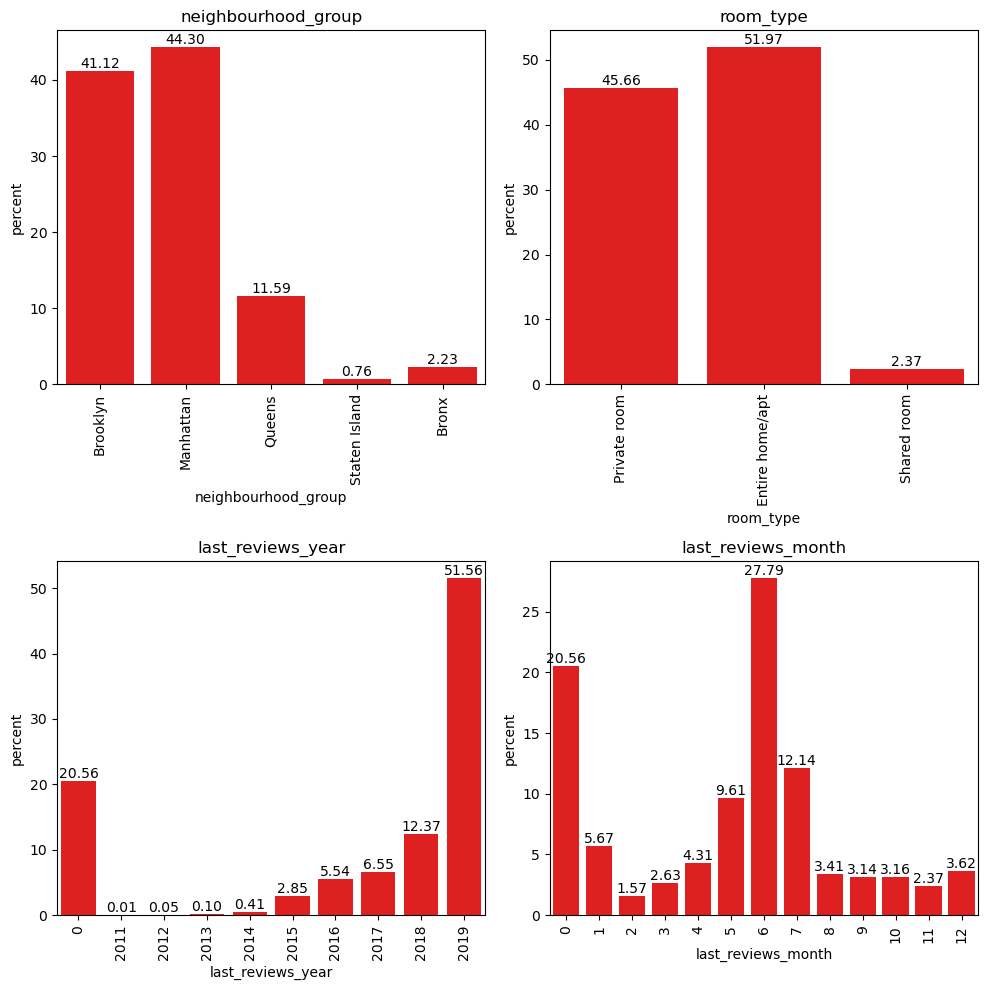

In [64]:
cat_cols_1=["neighbourhood_group","room_type","last_reviews_year","last_reviews_month"]
plt.figure(figsize=(10,10))
for i in enumerate(cat_cols_1):
    plt.subplot(2,2,i[0]+1)
    ax=sns.countplot(x=df[i[1]],stat="percent",palette=['r'])
    plt.title(i[1])
    plt.xticks(rotation=90)
    for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.show()

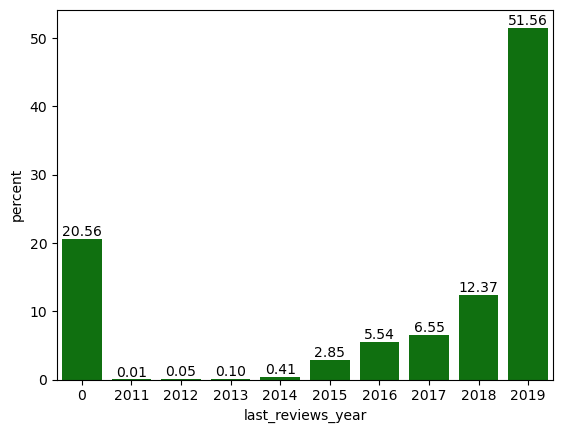

In [59]:
ax=sns.countplot(x=df["last_reviews_year"],stat="percent",palette=['g'])
for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')

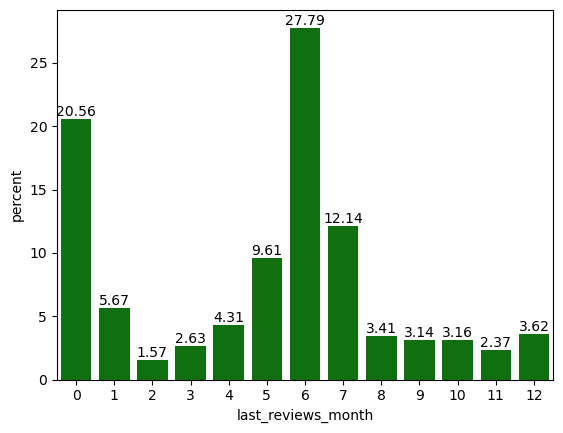

In [60]:
ax=sns.countplot(x=df["last_reviews_month"],stat="percent",palette=['g'])
for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')

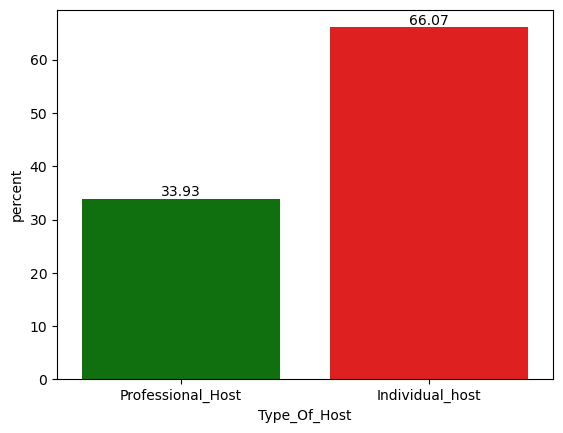

In [36]:
# Listings based on Types of Hosts
ax=sns.countplot(x=df["Type_Of_Host"],stat="percent",palette=['g','r'])
for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')

### Multivariate Analysis

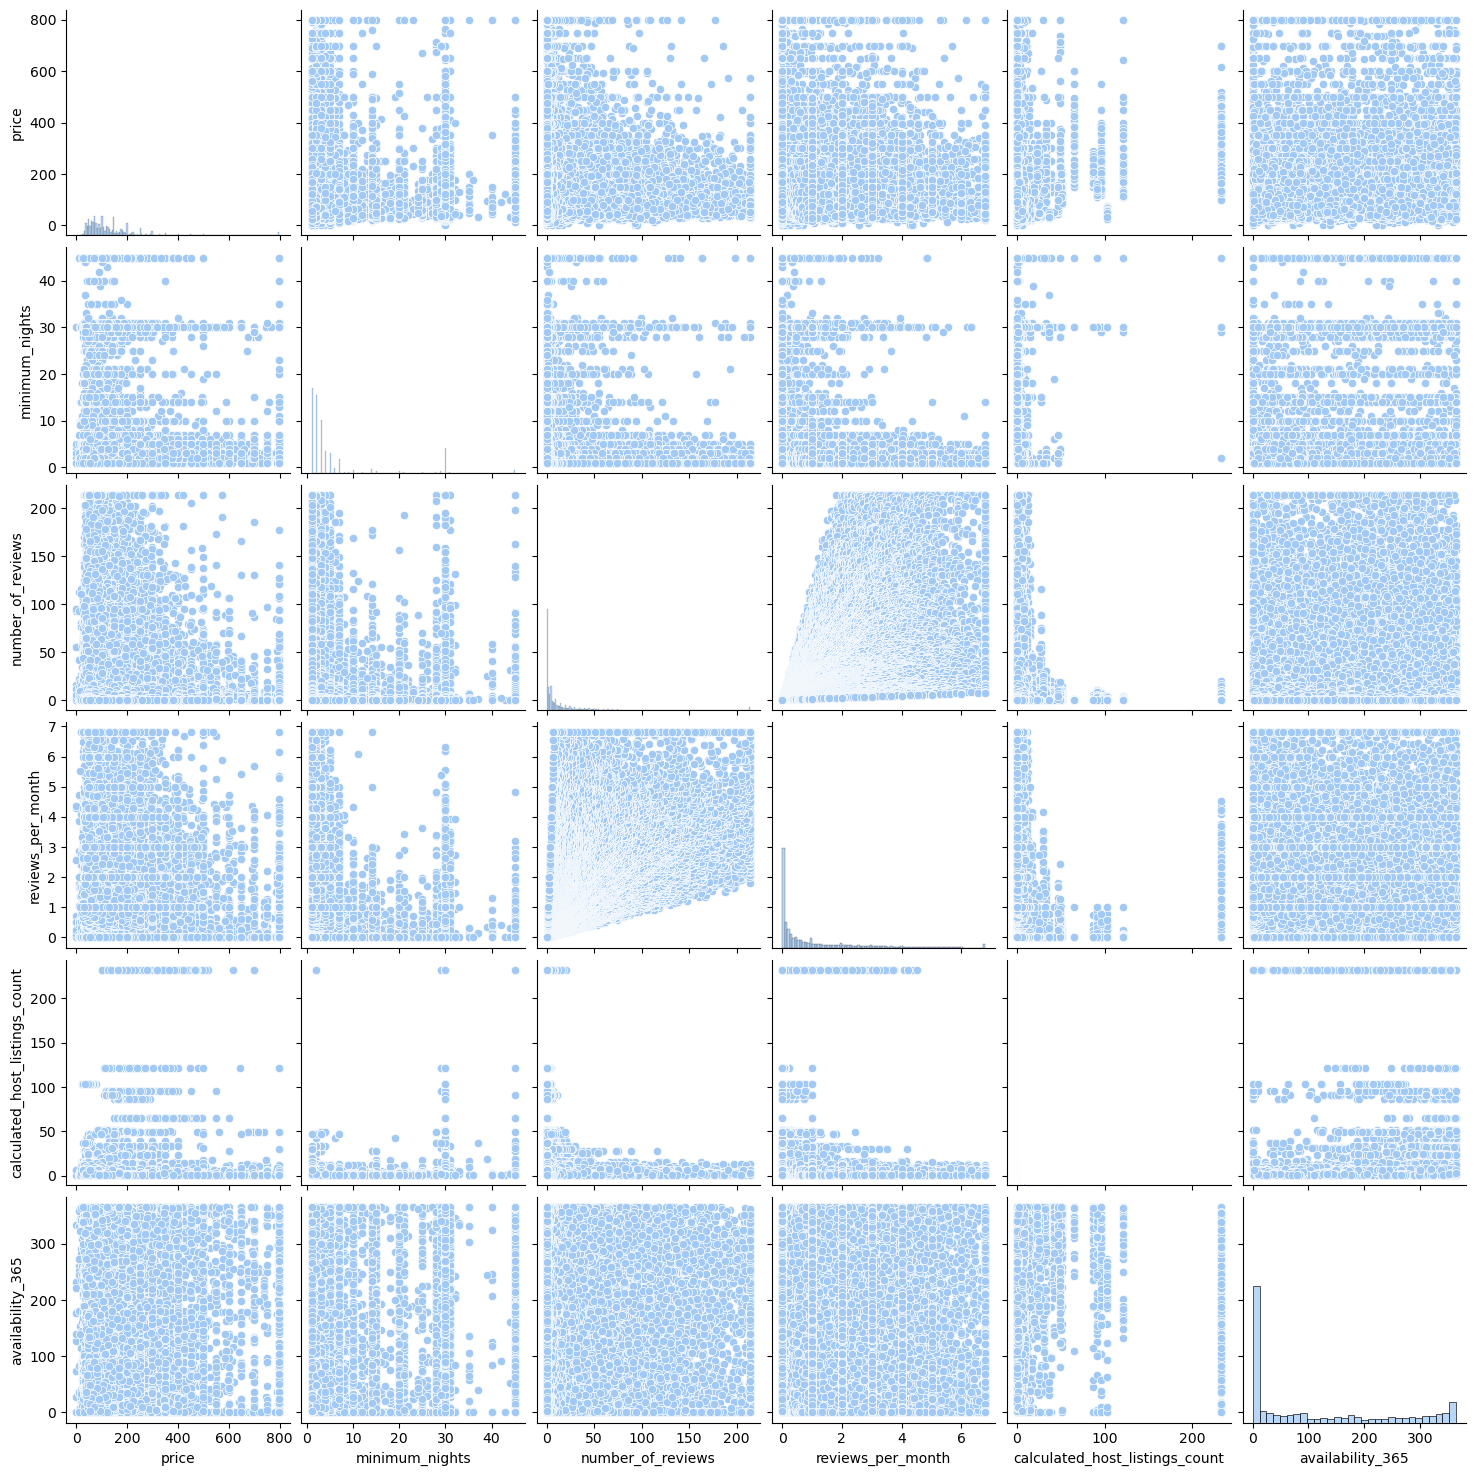

In [38]:
sns.pairplot(df[['price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']])

In [75]:
num_cols=['price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

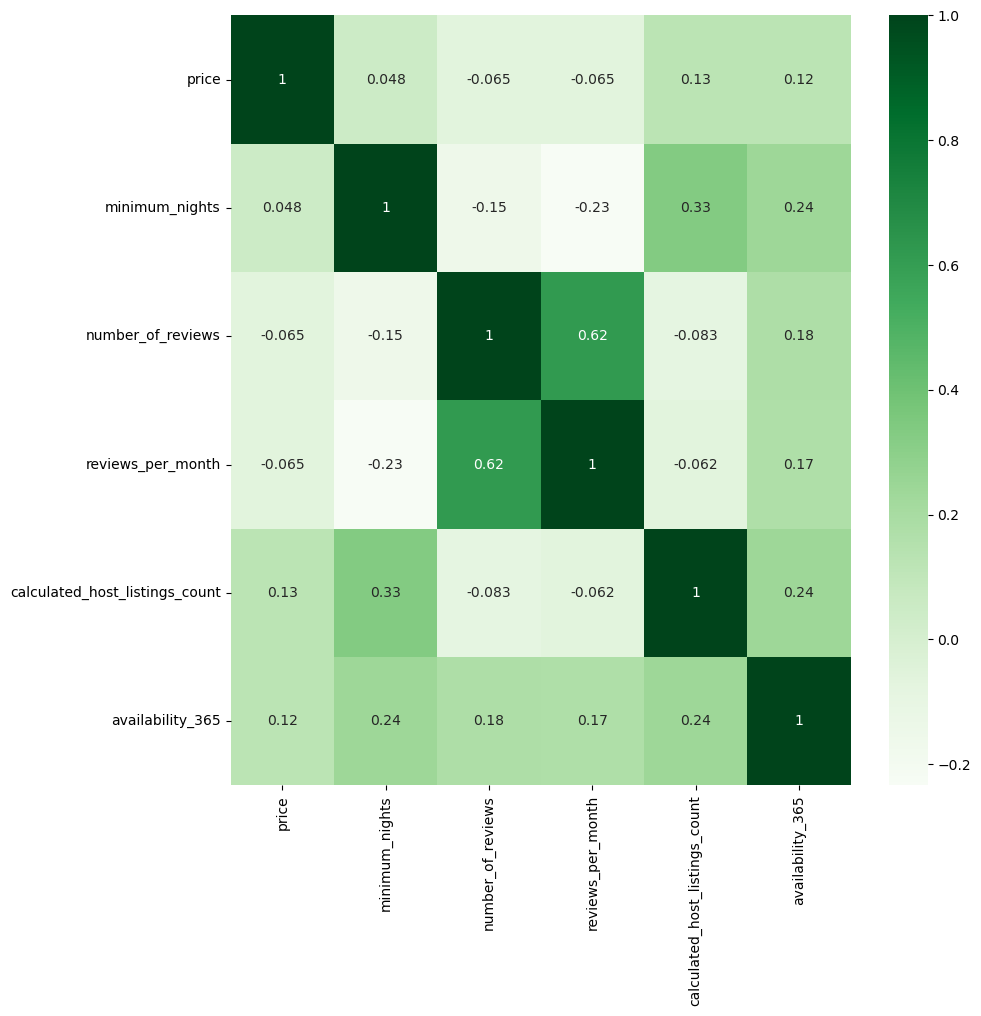

In [76]:

plt.figure(figsize=(10,10))
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Greens')
plt.show()

In [40]:
df.shape

(48895, 21)

In [41]:
df.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'last_reviews_month', 'last_reviews_year', 'Type_Of_Host',
       'Price_Group', 'minimum_nights_group', 'number_of_reviews_group',
       'availability_365_group'],
      dtype='object')

In [43]:
df.drop("last_review",axis=1,inplace=True)

In [44]:
# Exporting csv into desired path
df.to_csv("D:\Documents\DataScience\DataStorytelling\Assignment\cleaned_Airbnb_data.csv", index=False)